In [140]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [141]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [142]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [143]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [144]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [145]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [146]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [147]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [148]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

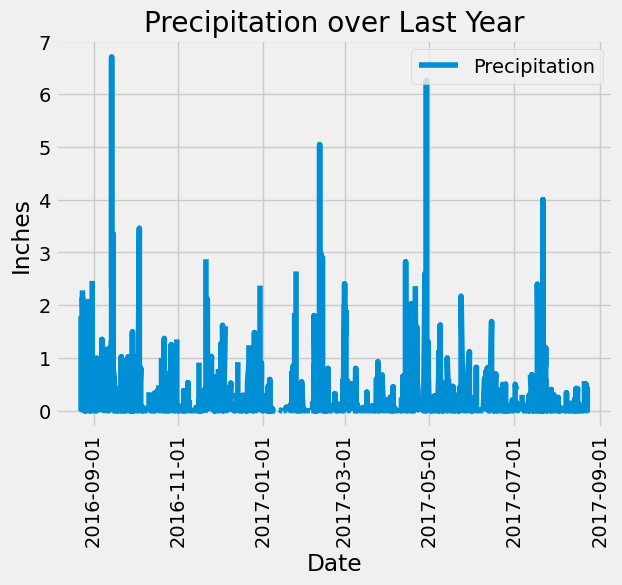

In [157]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = datetime.strptime('2017-08-23', "%Y-%m-%d")
# Calculate the date one year from the last date in data set.
one_year_from_last_date = recent_date - timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
prcp_scores_summary = session.query(Measurements.date, Measurements.prcp).\
                  filter(Measurements.date > one_year_from_last_date).all()
prcp_scores_summary
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_scores_summary, columns=['Date' , 'Precipitation'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

# Sort the dataframe by date
prcp_scores_summary_sorted = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.plot(prcp_scores_summary_sorted['Precipitation'], label='Precipitation')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation over Last Year')
plt.xticks(rotation = 90)
ax.legend(loc='upper right')

plt.show()

In [150]:
# Use Pandas to calculate the summary statistics for the precipitation data
prep_scores_summary_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [151]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations.station).count()

9

In [152]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurements.station,func.count(Measurements.station)]
session.query(*sel).group_by(Measurements.station).\
        order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [153]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_data = session.query(Measurements.station,func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).\
        filter(Measurements.station == 'USC00519281').all()
most_active_station_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

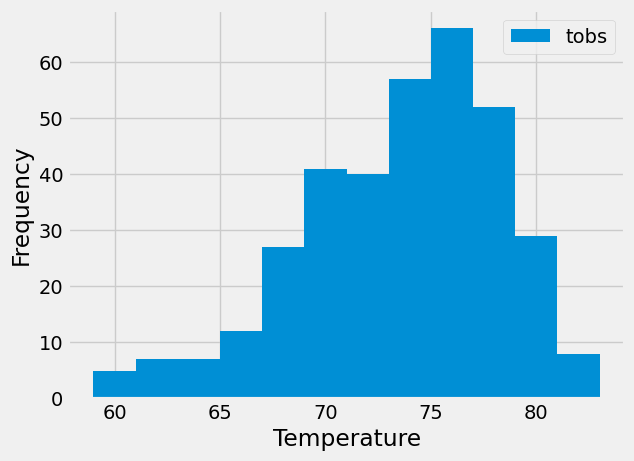

In [154]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_from_last_date = recent_date - timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results_station = session.query(Measurements.date, 
                        Measurements.tobs).\
                  filter(Measurements.date > one_year_from_last_date).\
                  filter(Measurements.station == 'USC00519281').all()
results_station
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_station= pd.DataFrame(results_station, columns=['Date' , 'Temperature'])
df_station.set_index('Date', inplace=True)
df_station
# Sort the dataframe by date
df_sorted_station = df_station.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.hist(df_sorted_station ['Temperature'], bins=12, label='tobs')

plt.xlabel('Temperature')
plt.ylabel('Frequency')
ax.legend(loc='upper right')
plt.show()

# Close Session

In [155]:
# Close Session
session.close()